## Подготовка прототипа модели для металлообрабатывающего предприятия

### Источник данных
Данные добывающей компании с параметрами добычи и очистки золотосодержащей руды.

### Основные цели проекта
Построить и обучить модель, которая будет помогать оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# 1. Подготовка данных

In [1]:
#Импорт необходимых библиотек.
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer

In [2]:
#Загружаем данные.
data = pd.read_csv('/datasets/gold_recovery_full.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [3]:
#Смотрим на данные.
data

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
#Смотрим общую информацию.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [5]:
#Определяю количество пропущенных значений в столбцах data.
print(data.isnull().sum())

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


In [6]:
#Смотрим общую информацию для тренировочной выборки.
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [7]:
#Смотрим общую информацию для тестовой выборки.
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

**Проверим, что эффективность обогащения рассчитана правильно.**

In [8]:
#Вычисляем эффективность обогащения самостоятельно. 
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

recovery_train = (C*(F-T))/(F*(C-T))*100

In [9]:
#Составим таблицу из нужных значений, уберем из нее пропуски.
data_mae = pd.DataFrame()
data_mae['recovery'] = recovery_train
data_mae['rougher'] = data_train['rougher.output.recovery']

data_mae.replace(0, np.nan, inplace=True)

data_mae.dropna(inplace = True)

In [10]:
#Найдем MAE между расчётами и значением признака.
m = mean_absolute_error(data_mae['recovery'], data_mae['rougher'])

print('Значение MAE между расчётами и значением признака:', m)

Значение MAE между расчётами и значением признака: 9.661285240080234e-15


#### Вывод

Средняя ошибка эффективности обогащения 9.661285240080234e-15%. Можно сделать вывод, что эффективность обогащения рассчитана правильно.

#### Предобработаем данные.

Добавим таргетные значения в тестовую выборку, так как сейчас они отсутствуют.

In [11]:
#Напишем функцию для заполнения data_test['rougher.output.recovery'] и data_test['final.output.recovery']. 
def fill_test_recovery(row):   
    row['rougher.output.recovery'] = data.loc[data['date'] == row['date'], 'rougher.output.recovery'].values[0]
    row['final.output.recovery'] = data.loc[data['date'] == row['date'], 'final.output.recovery'].values[0]

    return row

In [12]:
#Применим функцию.
data_test = data_test.apply(fill_test_recovery, axis = 1)

Пропуски в данных есть, их не очень много относительно общего объема данных.

Поэтому:
- удалим строки, в кторых таргетное значение (rougher.output.recovery) пропущено,
- остальные строки с пропусками заполним ближайшими значениями.

In [13]:
#Удалим строки, в которых таргетное значение rougher.output.recovery пропущено или нулевое.
data.dropna(subset = ['rougher.output.recovery'], inplace = True)
data.drop(data[data['rougher.output.recovery'] == 0.0].index, inplace = True)
data_train.dropna(subset = ['rougher.output.recovery'], inplace = True)
data_train.drop(data_train[data_train['rougher.output.recovery'] == 0.0].index, inplace = True)
data_test.dropna(subset = ['rougher.output.recovery'], inplace = True)
data_test.drop(data_test[data_test['rougher.output.recovery'] == 0.0].index, inplace = True)

In [14]:
#Удалим строки, в которых таргетное значение final.output.recovery пропущено или нулевое.
data.dropna(subset = ['final.output.recovery'], inplace = True)
data.drop(data[data['final.output.recovery'] == 0.0].index, inplace = True)
data_train.dropna(subset = ['final.output.recovery'], inplace = True)
data_train.drop(data_train[data_train['final.output.recovery'] == 0.0].index, inplace = True)
data_test.dropna(subset = ['final.output.recovery'], inplace = True)
data_test.drop(data_test[data_test['final.output.recovery'] == 0.0].index, inplace = True)

In [15]:
#Заполним пропуски в остальных столбцах, используя ffill.
data = data.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_train = data_train.fillna(method='ffill')

In [16]:
#Найдем значения колонок в тестовом и тренировочном наборах.
a = data_test.columns.values
b = data_train.columns.values


#Найдем разницу между ними, напечатаем на экране.
diff = []
count_match = 0
for i in b:
    if (i in a):
        count_match += 1
    else: 
        diff.append(i)
  
print(diff)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondar

Выше спиок столбцов, которые отсутствуют в data_test.

Что можно сказать про эти данные:
- Все эти данные типа float64.
- Среди данных: финальные параметры продуктов, отвальных хвстов, первичные параметры очистки продуктов, финальные параметры продуктов на этапе флотации, финальные парметры вторичной очистки.

Видимо, эти данные не помогут с прогнозом для данного технологического процесса.

Удалим эти столбцы из обучающей выборки, сравняв их.

In [17]:
#Удалим столбцы из обучающей выборки.
data_train.drop(diff, axis = 1, inplace = True)

###  Вывод

- Данные предобработаны: удалены/сделаны замены пропусков.
- Тестовая и обучающая выборки идентичны по столбцам.
- Проверена верность расчета эффективности обогащения.

Можно приступать к анализу.

# 2. Анализ данных

<font color=purple>Посмотрим изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</font>

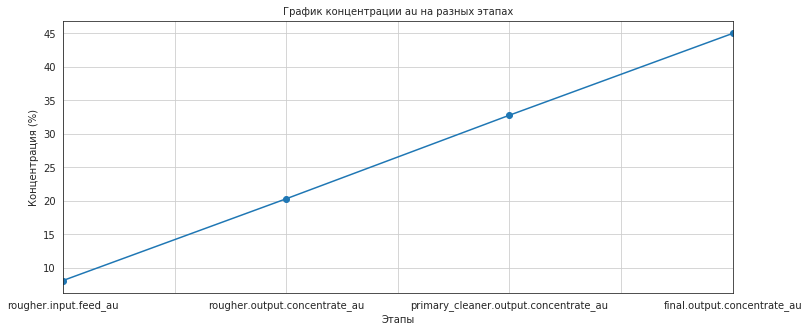

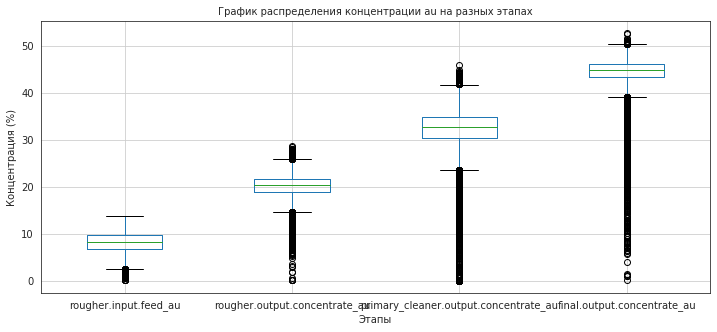

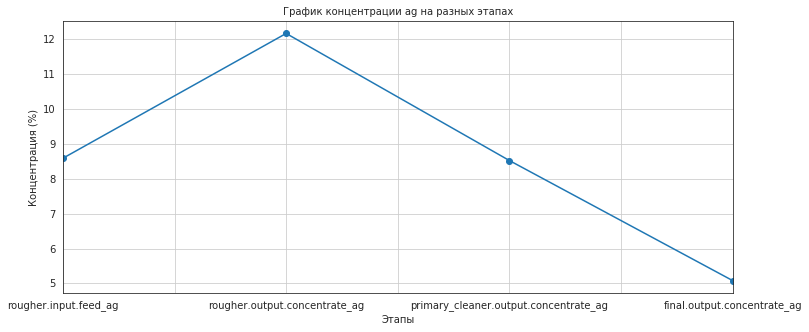

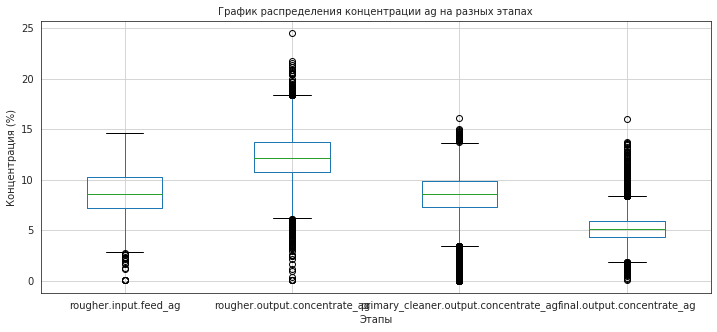

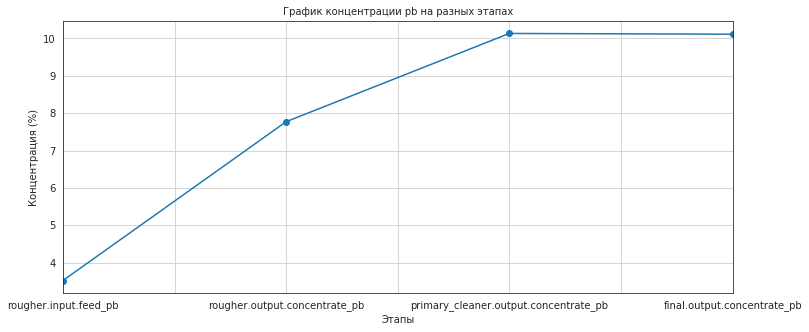

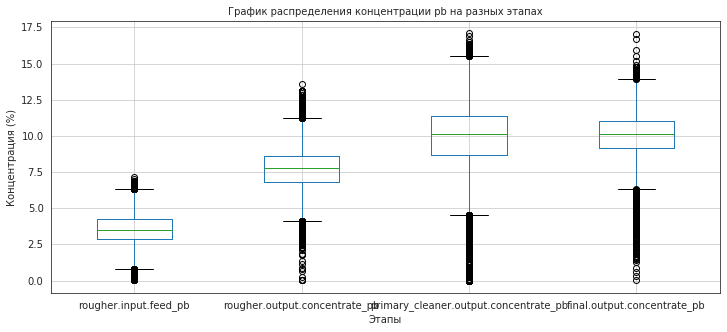

In [18]:
label = ['au', 'ag', 'pb']

for i in label:
    #Соберем нужные этапы для элемента.
    column_rougher_input_name = 'rougher.input.feed_' + str(i)
    column_rougher_name = 'rougher.output.concentrate_' + str(i)
    column_primary_name = 'primary_cleaner.output.concentrate_' + str(i)
    column_final_name = 'final.output.concentrate_' + str(i)
    data_concentrate = pd.DataFrame()
    data_concentrate[column_rougher_input_name] = data[column_rougher_input_name]
    data_concentrate[column_rougher_name] = data[column_rougher_name]
    data_concentrate[column_primary_name] = data[column_primary_name]
    data_concentrate[column_final_name] = data[column_final_name]
    
    #Построим гарфик концентраций для медианных значений каждого этапа.
    data_concentrate.median().plot(grid=True, figsize=(12, 5), style='o-')
    plt.title('График концентрации ' + str(i) + ' на разных этапах', fontsize=10)
    plt.ylabel('Концентрация (%)')
    plt.xlabel('Этапы')
    plt.show()
    
    #Построим гарфик распределения для значений каждого этапа.
    data_concentrate.boxplot(column=data_concentrate.columns.tolist(), figsize=(12, 5))
    plt.title('График распределения концентрации ' + str(i) + ' на разных этапах', fontsize=10)
    plt.ylabel('Концентрация (%)')
    plt.xlabel('Этапы')
    plt.show()

<font color=purple>Вывод</font>

В сырье меняется концентрация металлов на различных этапах очистки:
- концентрация Au стабильно растет, т.к. это целевой металл,
- концентрация Ag падает,
- концентрация Pb выросла и начала снижаться.

<font color=purple>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</font>

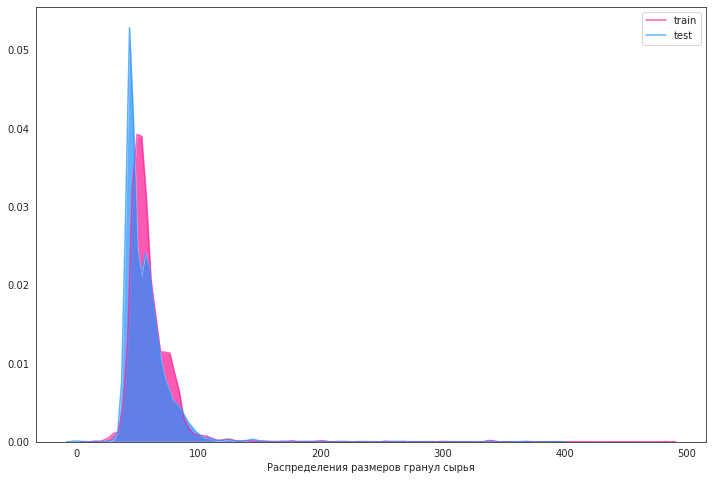

In [19]:
#Построим гистограммы плотности распределения размеров гранул сырья на обучающей и тестовой выборках.
plt.figure(figsize=(12,8))
#plt.hist(data_train['rougher.input.feed_size'] , bins=80, range = (20, 150), label='train')
#plt.hist(data_test['rougher.input.feed_size'] , bins=80, range = (20, 150), label='test')
sns.kdeplot(data_train['rougher.input.feed_size'], shade=True, color="deeppink", alpha=.7, label='train')
sns.kdeplot(data_test['rougher.input.feed_size'], shade=True, color="dodgerblue", alpha=.7, label='test')
plt.legend(loc='upper right')
plt.xlabel('Распределения размеров гранул сырья')
plt.show()

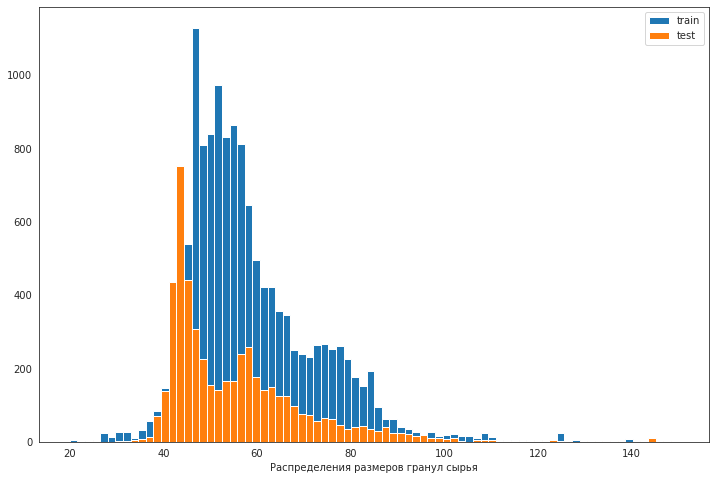

In [20]:
#Построим гистограммы частоты распределения размеров гранул сырья на обучающей и тестовой выборках.
plt.figure(figsize=(12,8))
plt.hist(data_train['rougher.input.feed_size'] , bins=80, range = (20, 150), label='train')
plt.hist(data_test['rougher.input.feed_size'] , bins=80, range = (20, 150), label='test')
plt.legend(loc='upper right')
plt.xlabel('Распределения размеров гранул сырья')
plt.show()

<font color=purple>Вывод</font>

Распределения размеров гранул сырья на обучающей и тестовой выборках схожи. 

<font color=purple>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</font>

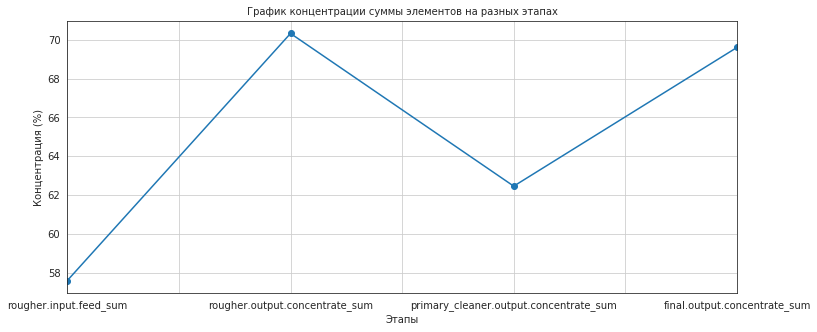

In [21]:
#Соберем нужные этапы для элемента.
data_concentrate_sum = pd.DataFrame()
data_concentrate_sum['rougher.input.feed_sum'] = data['rougher.input.feed_au']+data['rougher.input.feed_ag']+data['rougher.input.feed_pb']+data['rougher.input.feed_sol']
data_concentrate_sum['rougher.output.concentrate_sum'] = data['rougher.output.concentrate_au']+data['rougher.output.concentrate_ag']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_sol']
data_concentrate_sum['primary_cleaner.output.concentrate_sum'] = data['primary_cleaner.output.concentrate_au']+data['primary_cleaner.output.concentrate_ag']+data['primary_cleaner.output.concentrate_pb']+data['primary_cleaner.output.concentrate_sol']
data_concentrate_sum['final.output.concentrate_sum'] = data['final.output.concentrate_au']+data['final.output.concentrate_ag']+data['final.output.concentrate_pb']+data['final.output.concentrate_sol']
    
#Построим гарфик концентраций для медианных значений каждого этапа.
data_concentrate_sum.median().plot(grid=True, figsize=(12, 5), style='o-')
plt.title('График концентрации суммы элементов на разных этапах', fontsize=10)
plt.ylabel('Концентрация (%)')
plt.xlabel('Этапы')
plt.show()

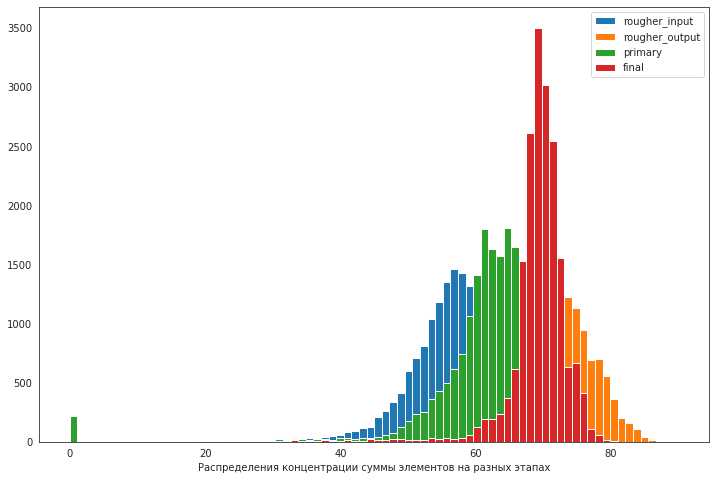

In [22]:
#Построим гистограммы частоты распределения размеров гранул сырья на обучающей и тестовой выборках.
plt.figure(figsize=(12,8))

plt.hist(data_concentrate_sum['rougher.input.feed_sum'], bins=80, range = (0, 90), label='rougher_input')
plt.hist(data_concentrate_sum['rougher.output.concentrate_sum'], bins=80, range = (0, 90), label='rougher_output')
plt.hist(data_concentrate_sum['primary_cleaner.output.concentrate_sum'], bins=80, range = (0, 90), label='primary')
plt.hist(data_concentrate_sum['final.output.concentrate_sum'], bins=80, range = (0, 90), label='final')

plt.legend(loc='upper right')
plt.xlabel('Распределения концентрации суммы элементов на разных этапах')
plt.show()

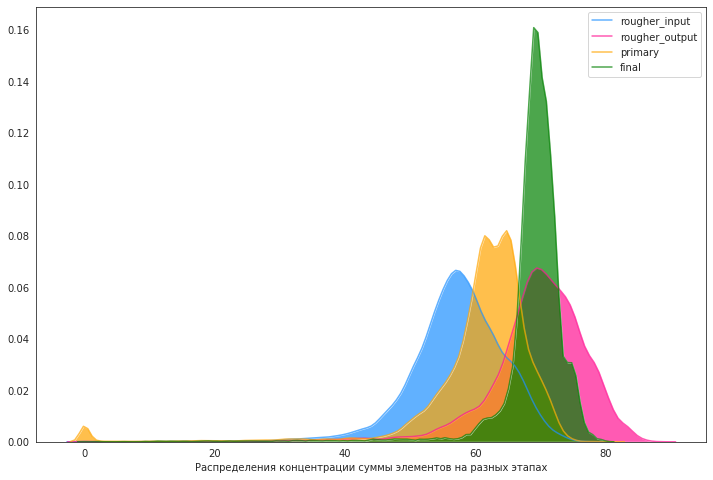

In [23]:
#Построим гистограммы плотности распределения размеров гранул сырья на обучающей и тестовой выборках.
plt.figure(figsize=(12,8))

sns.kdeplot(data_concentrate_sum['rougher.input.feed_sum'], shade=True, color="dodgerblue", alpha=.7, label='rougher_input')
sns.kdeplot(data_concentrate_sum['rougher.output.concentrate_sum'], shade=True, color="deeppink", alpha=.7, label='rougher_output')
sns.kdeplot(data_concentrate_sum['primary_cleaner.output.concentrate_sum'], shade=True, color="orange", alpha=.7, label='primary')
sns.kdeplot(data_concentrate_sum['final.output.concentrate_sum'], shade=True, color="green", alpha=.7, label='final')

plt.legend(loc='upper right')
plt.xlabel('Распределения концентрации суммы элементов на разных этапах')
plt.show()

In [24]:
#Строим список дат данных выбросов для удаления
dates_for_drop = data.loc[data_concentrate_sum[(data_concentrate_sum['rougher.input.feed_sum'] < 10) 
                               | (data_concentrate_sum['rougher.output.concentrate_sum'] < 10) 
                               | (data_concentrate_sum['final.output.concentrate_sum'] < 10) 
                               | (data_concentrate_sum['primary_cleaner.output.concentrate_sum'] < 10)].index,'date'].values
#Удаляем выбросы из всех 3х таблиц.
for i in dates_for_drop:
    for d in [data, data_train, data_test]:
        d.drop(d[d['date'] == i].index, inplace = True)

<font color=purple>Вывод</font>

- Суммарная концентрация элементов растет от этапа к этапу.
- Если рассмотреть распределения каждого этапа, то они схожи, имеют аномалию в районе 0.

### Вывод

В сырье меняется концентрация металлов на различных этапах очистки:
- концентрация Au стабильно растет, т.к. это целевой металл,
- концентрация Ag падает,
- концентрация Pb выросла и начала снижаться.

Суммарная концентрация элементов также растет от этапа к этапу. Если рассмотреть распределения каждого этапа, то они схожи. Присутствует аномалия в данных в районе 0.

Распределения размеров гранул сырья на обучающей и тестовой выборках схожи.

# 3. Модель

<font color=purple>Напишем функцию для вычисления итоговой sMAPE.</font>

In [25]:
#Напишем функцию для вычисления sMAPE.
def sMAPE(ar_1, ar_2):
    if (len(ar_1) != len(ar_2)):
        print('Длинна не совпадает')
        return ('error')
    len_n = len(ar_1)
    sum_ar = 0.0
    for i in range(len_n):
        sum_ar += abs(ar_1[i] - ar_2[i])/((abs(ar_1[i]) + abs(ar_2[i]))/2)
        
    return ((sum_ar)/len_n)*100

In [26]:
#Напишем функцию для вычисления итоговой sMAPE.
def final_sMAPE(rougher_output_recovery_predict, rougher_output_recovery_test, 
                final_output_recovery_predict, final_output_recovery_test):
    return (0.25*sMAPE(rougher_output_recovery_predict, rougher_output_recovery_test) 
            + 0.75*sMAPE(final_output_recovery_predict, final_output_recovery_test))

<font color=purple>Обучим модели.</font>

In [27]:
#Удалим столбец date, т.к. он нам больше не нужен.
data_test.drop(['date'], axis=1, inplace=True)
data_train.drop(['date'], axis=1, inplace=True)

In [28]:
#Выделяем features.
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#Выделяем таргетное значение rougher.output.recovery.
target_train_rougher = data_train['rougher.output.recovery'].values
target_test_rougher = data_test['rougher.output.recovery'].values

#Выделяем таргетное значение final.output.recovery.
target_train_final = data_train['final.output.recovery'].values
target_test_final = data_test['final.output.recovery'].values

**Построим модели LinearRegression.**

In [29]:
#Построим модели LinearRegression для rougher и final.
model_lr_rougher = LinearRegression()
model_lr_final = LinearRegression()

predictions_lr_rougher = cross_val_predict(model_lr_rougher, features_train, target_train_rougher, cv=5)
predictions_lr_final = cross_val_predict(model_lr_final, features_train, target_train_final, cv=5)

print('Значение итогового sMAPE с кросс-валидацией:', 
      final_sMAPE(predictions_lr_rougher, target_train_rougher, predictions_lr_final, target_train_final))

Значение итогового sMAPE с кросс-валидацией: 10.150031266627186


**Построим модели RandomForestRegressor.**

In [30]:
#Построим модель RandomForestRegressor для rougher.
#Обучаем модель на обучающей выборке, изменяя гиперпараметр. 
#Выберем вариант с наилучшим качеством.

acc_dict_rfr = {}
for estim in range(1, 101, 10):
    model_1 = RandomForestRegressor(random_state=12345, n_estimators=estim)
    model_2 = RandomForestRegressor(random_state=12345, n_estimators=estim)
    predictions_rougher = cross_val_predict(model_1, features_train, target_train_rougher, cv=3)
    predictions_final = cross_val_predict(model_2, features_train, target_train_final, cv=3)
    acc_dict_rfr[estim] = final_sMAPE(predictions_rougher, target_train_rougher, predictions_final, target_train_final)

for k, v in acc_dict_rfr.items():
    if(v == min(acc_dict_rfr.values())):
        estim_min = k

In [31]:
print('Значение итогового sMAPE с кросс-валидацией:', min(acc_dict_rfr.values()))

Значение итогового sMAPE с кросс-валидацией: 9.997194485595843


**Построим модели DecisionTreeRegressor.**

In [32]:
#Построим модель DecisionTreeRegressor для rougher.
model_dtr_rougher = DecisionTreeRegressor(random_state=12345)
model_dtr_final = DecisionTreeRegressor(random_state=12345)

predictions_dtr_rougher = cross_val_predict(model_dtr_rougher, features_train, target_train_rougher, cv=5)
predictions_dtr_final = cross_val_predict(model_dtr_final, features_train, target_train_final, cv=5)

print('Значение итогового sMAPE с кросс-валидацией:', 
      final_sMAPE(predictions_dtr_rougher, target_train_rougher, predictions_dtr_final, target_train_final))

Значение итогового sMAPE с кросс-валидацией: 15.051702499837576


Лучшее значение дает модель: RandomForestRegressor.

Для итоговой проверки выберем ее.

In [33]:
#Посчитаем итоговое значение sMAPE для RandomForestRegressor.
model_rfr_rougher = RandomForestRegressor(random_state=12345, n_estimators=estim_min)
model_rfr_final = RandomForestRegressor(random_state=12345, n_estimators=estim_min)

model_rfr_rougher.fit(features_train, target_train_rougher)
model_rfr_final.fit(features_train, target_train_final)

predictions_rougher = model_rfr_rougher.predict(features_test)
predictions_final = model_rfr_final.predict(features_test)

print('Итоговое значение sMAPE для RandomForestRegressor:', 
      final_sMAPE(predictions_rougher, target_test_rougher, predictions_final, target_test_final))

Итоговое значение sMAPE для RandomForestRegressor: 7.337123797196776


### Вывод

Лучшее значение получено на модели: RandomForestRegressor. Полученные значения кросс-валидации и функции sMAPE наименьшие. Ее можно использовать далее для предсказания коэффициента восстановления золота из золотосодержащей руды.

**Проверка на адекватность полученной модели.**

In [34]:
#Составим Series из средних значений.
x = [(pd.Series(target_train_rougher)).mean()] * len(target_test_rougher)
y = [(pd.Series(target_train_final)).mean()] * len(target_test_rougher)
const_pd_x = pd.Series(x)
const_pd_y = pd.Series(y)

In [35]:
#Расчитаме ее final_sMAPE.
print('Значение final_sMAPE на константной выборке из медиан:', 
      final_sMAPE(const_pd_x, target_test_rougher, const_pd_y, target_test_final))

Значение final_sMAPE на константной выборке из медиан: 7.735619800649531


Значение, полученное на константной модели из средних значений, немного хуже того, что получено по итогу исследования: разница на 0,4.